## MLE Approach

In [1]:
import pandas as pd
from ECIRModel import ECIRModel
from CIRModel import BasicCIRModel
import numpy as np
import matplotlib.pyplot as plt

### Merge Dataframe

In [2]:
import pandas as pd

# Load the DGS_30 data
dgs_30_path = 'DGS_30.csv'
dgs_30_data = pd.read_csv(dgs_30_path)

# Load the DGS3MO data
dgs3mo_path = 'DGS3MO.csv'
dgs3mo_data = pd.read_csv(dgs3mo_path)

# Convert the 'DATE' column to datetime and set it as index for both DataFrames
dgs_30_data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
dgs_30_data['Date'] = pd.to_datetime(dgs_30_data['Date'])
dgs_30_data.set_index('Date', inplace=True)

dgs3mo_data.rename(columns={'DATE': 'Date'}, inplace=True)
dgs3mo_data['Date'] = pd.to_datetime(dgs3mo_data['Date'])
dgs3mo_data.set_index('Date', inplace=True)

# Insert the DGS3MO data into the DGS_30 data as the first column
dgs_30_data.insert(0, 'DGS3MO', dgs3mo_data['DGS3MO'])

data=dgs_30_data
# Check the result
data.head()

,DGS3MO,DGS1,DGS2,DGS3,DGS4,DGS5,DGS6,DGS7,DGS8,DGS9,...,DGS21,DGS22,DGS23,DGS24,DGS25,DGS26,DGS27,DGS28,DGS29,DGS30
Date,,,,,,,,,,,,,,,,,,,,,
1981-09-01,17.010,17.0600,16.780,16.57,16.350396,16.120,15.898415,15.710,15.573295,15.478799,...,15.070462,15.049236,15.025332,14.997763,14.965539,14.927672,14.883173,14.831054,14.770326,14.7000
1981-09-02,16.650,17.1600,16.780,16.43,16.225968,16.090,15.924878,15.750,15.604572,15.490415,...,15.103136,15.093330,15.078842,15.057928,15.028848,14.989861,14.939224,14.875196,14.796035,14.7000
1981-09-03,16.960,17.3100,16.900,16.48,16.262789,16.140,15.967593,15.780,15.640102,15.546094,...,15.194779,15.177243,15.156281,15.130776,15.099616,15.061687,15.015875,14.961065,14.896145,14.8200
1981-09-04,16.640,17.2400,16.890,16.52,16.302912,16.170,16.019604,15.860,15.720523,15.604793,...,15.237907,15.232570,15.222048,15.204398,15.177676,15.139941,15.089248,15.023655,14.941220,14.8400
1981-09-07,16.565,17.2775,16.935,16.55,16.336354,16.215,16.066772,15.905,15.767511,15.657616,...,15.328694,15.324179,15.314622,15.298188,15.273045,15.237358,15.189294,15.127019,15.048698,14.9525


### CIR Model

#### Yield Rate Prediction

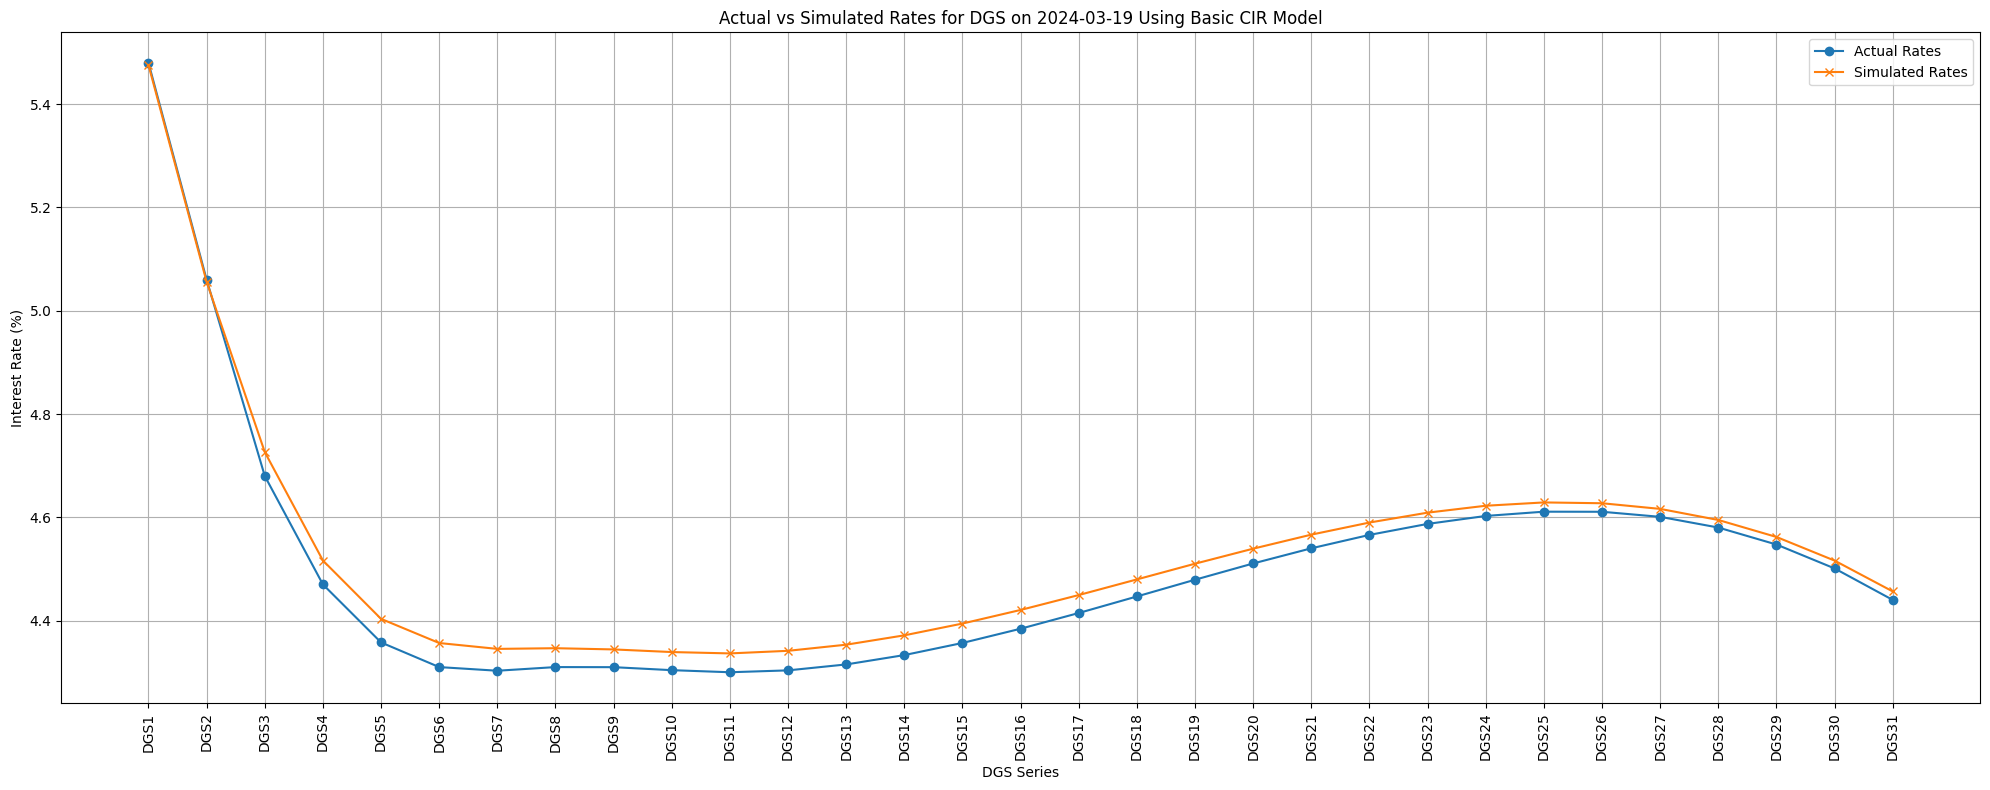

,Actual Rates,Simulated Rates
DGS3MO,5.480000,5.475685
DGS1,5.060000,5.056010
DGS2,4.680000,4.726318
DGS3,4.470000,4.516357
DGS4,4.357705,4.403341
DGS5,4.310000,4.356576
DGS6,4.302930,4.345235
DGS7,4.310000,4.346548
DGS8,4.309832,4.344186
DGS9,4.304042,4.339108


In [3]:
# Optimized parameters provided by the user
optimized_params = {
    "kappa": 0.2000,
    "mu_r": 0.0500,
    "sigma": 0.0100
}

# Creating an instance of the BasicCIRModel with the optimized parameters
basic_cir_model = BasicCIRModel(**optimized_params)


# Define the simulation date
simulation_date = pd.Timestamp('2024-03-19')

# Extract the actual rates for the simulation date from the mock data
# (Replace this with the actual data loading code in practice)
actual_rates = data.loc[simulation_date]

# Define the simulation function for a single rate using BasicCIRModel
def simulate_single_rate_cir(model, initial_rate):
    dt = 1 / 252  # Assume dt is 1 day as we simulate just for the next day
    return model.next_rate(initial_rate, dt)

# Create a dictionary to hold the simulated rates for each DGS using BasicCIRModel
simulated_rates_cir = {}

# Run the simulation for each DGS column
for column in actual_rates.index:
    if 'DGS' in column:
        initial_rate = data[column].loc[data.index < simulation_date].iloc[-1]
        simulated_rates_cir[column] = simulate_single_rate_cir(basic_cir_model, initial_rate)

# Convert the simulated rates dictionary to a DataFrame
simulated_rates_cir_df = pd.DataFrame(simulated_rates_cir, index=[simulation_date])

# Combine actual and simulated rates into one DataFrame for comparison
comparison_data_cir = pd.DataFrame({
    'Actual Rates': actual_rates,
    'Simulated Rates': simulated_rates_cir_df.iloc[0]
})

# Now we'll create a line plot with the correct x-axis labels
dgs_labels = [f'DGS{i+1}' for i in range(len(comparison_data_cir.index))]

# Plotting
plt.figure(figsize=(20, 8))
plt.plot(dgs_labels, comparison_data_cir['Actual Rates'], label='Actual Rates', marker='o')
plt.plot(dgs_labels, comparison_data_cir['Simulated Rates'], label='Simulated Rates', marker='x')
plt.title('Actual vs Simulated Rates for DGS on 2024-03-19 Using Basic CIR Model')
plt.xlabel('DGS Series')
plt.ylabel('Interest Rate (%)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

comparison_data_cir  

#### Bond Price Prediction

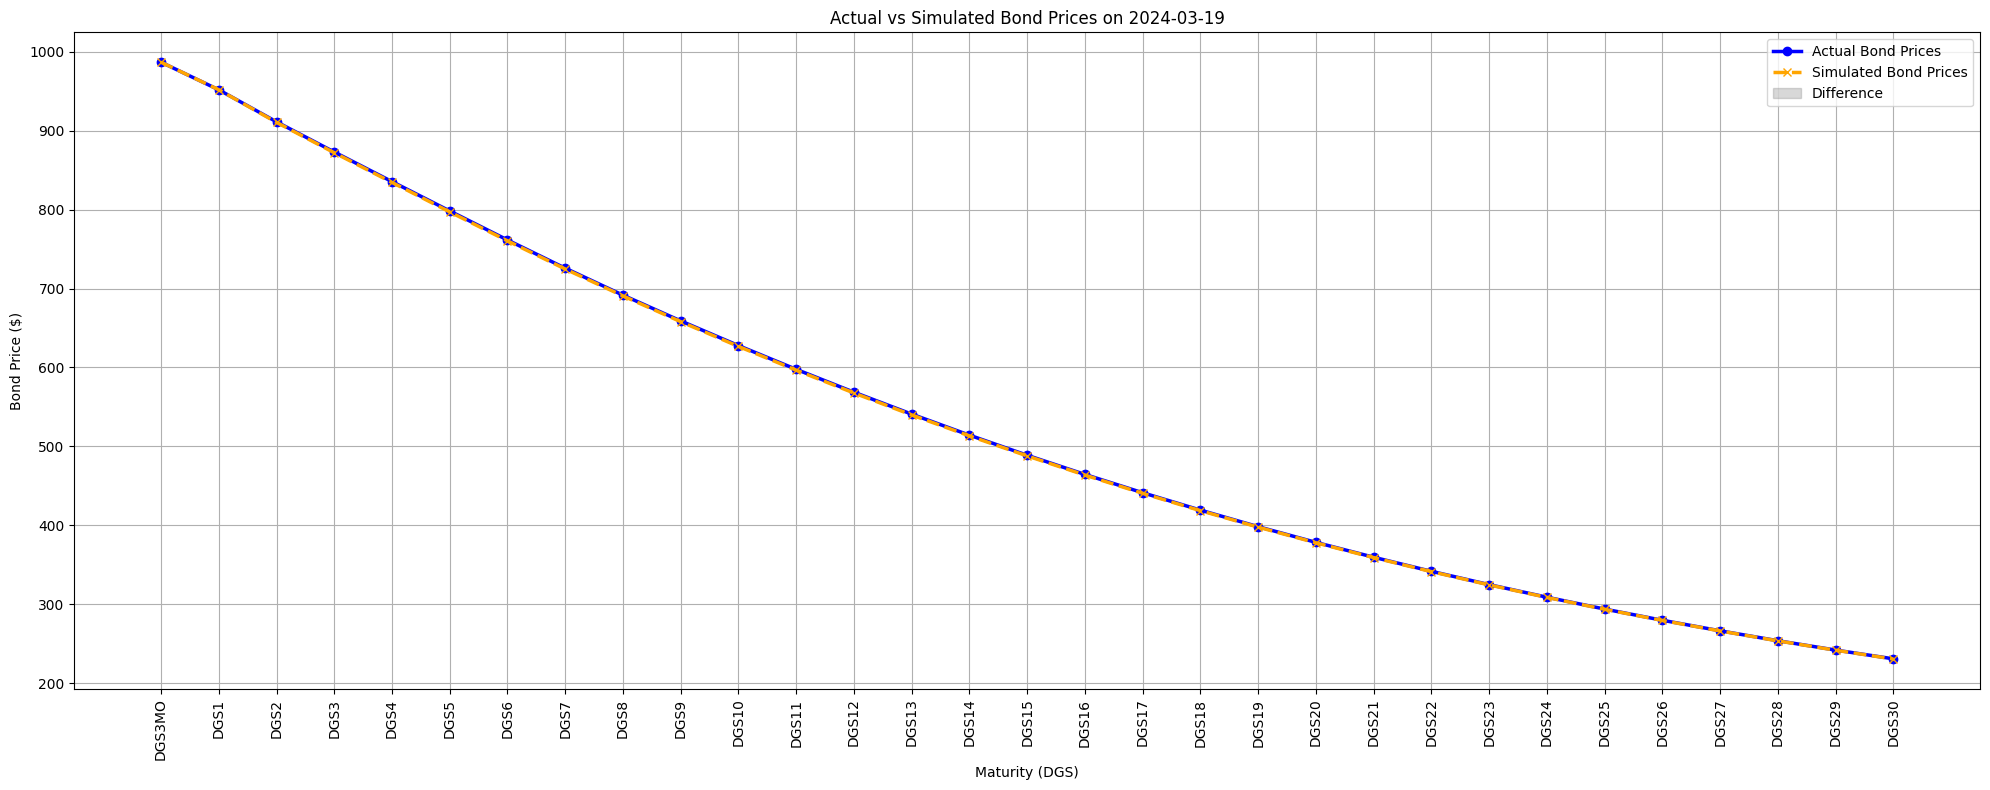

,Actual Bond Prices,Simulated Bond Prices
DGS3MO,986.771101,986.770715
DGS1,951.780799,951.792295
DGS2,911.221079,910.507634
DGS3,872.980908,872.008671
DGS4,835.480943,834.395002
DGS5,798.283292,797.081829
DGS6,761.528030,760.380658
DGS7,725.782444,724.685905
DGS8,691.619012,690.628897
DGS9,659.006523,657.963392


In [4]:
# Define the bond's face value
face_value = 1000  # For example, the face value of the bond

# Function to convert nominal annual rate to continuous compounding rate
def nominal_to_continuous(nominal_rate):
    return np.log(1 + nominal_rate)

# Function to calculate bond price using the CIR model for zero-coupon bonds
def calculate_bond_price_cir(model, rt, T, t=0):
    return model.bond_price(rt, T, t)

# Function to simulate bond prices
def simulate_bond_prices(model, data, face_value, simulation_date):
    simulated_bond_prices = {}
    for column in data.columns:
        if 'DGS' in column:
            try:
                last_rate = data[column].loc[data.index < simulation_date].iloc[-1] / 100
                simulated_rate = model.next_rate(last_rate, 1/252)  
                
                maturity = (int(column.replace('DGS', '').replace('MO', '')) / 12) if 'MO' in column else int(column.replace('DGS', ''))
                continuous_rate = nominal_to_continuous(simulated_rate)
                
                bond_price = calculate_bond_price_cir(model, continuous_rate, maturity) * face_value
                simulated_bond_prices[column] = bond_price
            except ValueError:
                continue
    return simulated_bond_prices


# Function to calculate actual bond prices using market rates
def calculate_actual_bond_prices(data, face_value, simulation_date):
    actual_bond_prices = {}
    for column in data.columns:
        if 'DGS' in column:
            try:
                last_nominal_rate = data[column].loc[data.index <= simulation_date].iloc[-1] / 100
                last_continuous_rate = nominal_to_continuous(last_nominal_rate)
                
                maturity = (int(column.replace('DGS', '').replace('MO', '')) / 12) if 'MO' in column else int(column.replace('DGS', ''))
                
                # Calculate bond price using the continuous rate
                bond_price = calculate_bond_price_cir(basic_cir_model, last_continuous_rate, maturity) * face_value
                actual_bond_prices[column] = bond_price
            except ValueError:
                continue
    return actual_bond_prices

# Simulate bond prices
simulated_bond_prices = simulate_bond_prices(basic_cir_model, data, face_value, simulation_date)

# Calculate actual bond prices
actual_bond_prices = calculate_actual_bond_prices(data, face_value, simulation_date)

# Create DataFrames from the bond prices
simulated_bond_prices_df = pd.DataFrame(simulated_bond_prices, index=[simulation_date])
actual_bond_prices_df = pd.DataFrame(actual_bond_prices, index=[simulation_date])

# Create a DataFrame from the simulated bond prices
simulated_bond_prices_df = pd.DataFrame(simulated_bond_prices, index=[simulation_date])# Function to calculate actual bond prices using the same formula as for simulated prices


# Create a DataFrame from the actual bond prices
actual_bond_prices_df = pd.DataFrame(actual_bond_prices, index=[simulation_date])

# Create a DataFrame combining actual and simulated bond prices
combined_bond_prices_df = pd.DataFrame({
    'Actual Bond Prices': actual_bond_prices_df.iloc[0],
    'Simulated Bond Prices': simulated_bond_prices_df.iloc[0]
})


# Plotting both actual and simulated bond prices with enhanced visibility
plt.figure(figsize=(20, 8))

# Plot actual bond prices with a solid blue line and circle markers
plt.plot(combined_bond_prices_df.index, combined_bond_prices_df['Actual Bond Prices'],
         label='Actual Bond Prices', marker='o', linestyle='-', color='blue', linewidth=2.5)

# Plot simulated bond prices with a dashed orange line and x markers
plt.plot(combined_bond_prices_df.index, combined_bond_prices_df['Simulated Bond Prices'],
         label='Simulated Bond Prices', marker='x', linestyle='--', color='orange', linewidth=2.5)

# Highlight the differences by plotting the differences
plt.fill_between(combined_bond_prices_df.index, 
                 combined_bond_prices_df['Actual Bond Prices'], 
                 combined_bond_prices_df['Simulated Bond Prices'], 
                 color='gray', alpha=0.3, label='Difference')

# Title and labels
plt.title('Actual vs Simulated Bond Prices on ' + str(simulation_date.date()))
plt.xlabel('Maturity (DGS)')
plt.ylabel('Bond Price ($)')

# Improve the x-axis labels readability
plt.xticks(rotation=90)

# Legend and grid
plt.legend()
plt.grid(True)

# Layout adjustment
plt.tight_layout()

# Show the plot
plt.show()
combined_bond_prices_df

### ECIR Model


#### Yield Curve Rate

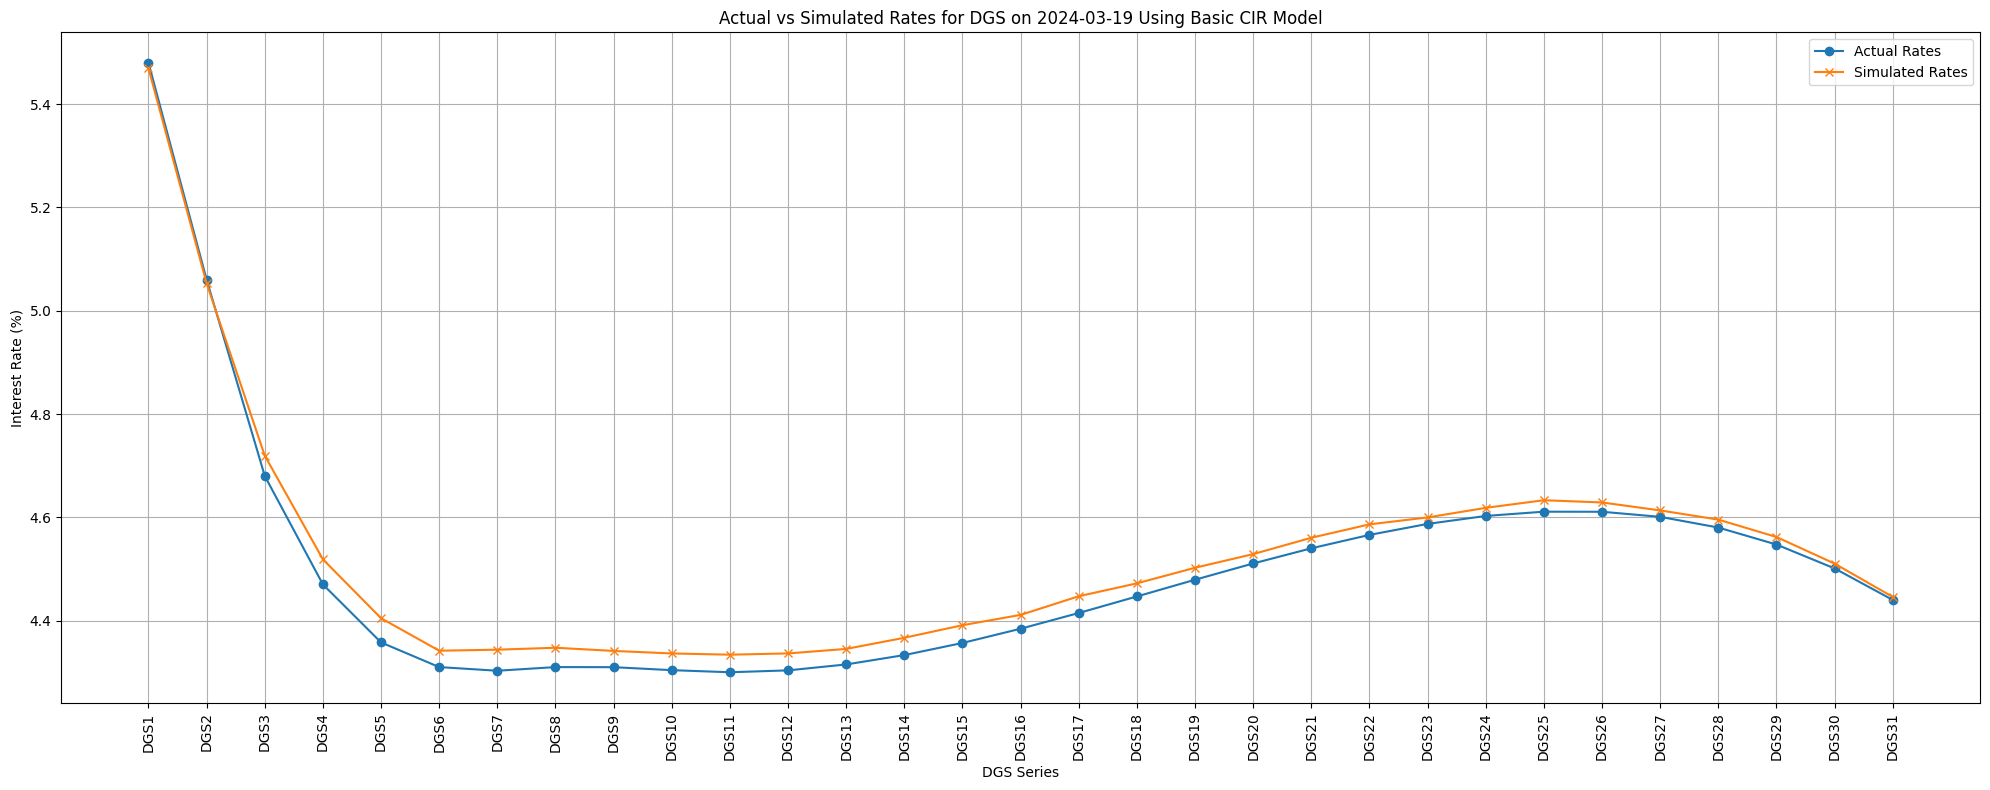

In [5]:

# Model parameters
params = {
    "kappa": 0.5000,
    "mu_r": 0.0300,
    "sigma": 0.0300,
    "mu": 0.0000,
    "gamma": 0.0100,
    "r": 10,  # Ensure 'r' is an integer
    "p": 0.5000
}

# Creating an instance of the ECIRModel
model = ECIRModel(**params)# Define the simulation date
simulation_date = pd.Timestamp('2024-03-19')

# Extract the actual rates for the simulation date
actual_rates = data.loc[simulation_date]

# Define the simulation function for a single rate
def simulate_single_rate(model, initial_rate):
    # Assume dt is 1 day as we simulate just for the next day
    dt = 1 / 252
    return model.next_rate(initial_rate, dt)

# Create a dictionary to hold the simulated rates for each DGS
simulated_rates = {}

# Run the simulation for each DGS column
for column in actual_rates.index:
    if 'DGS' in column:
        # Get the initial rate from the previous available data point
        initial_rate = data[column].loc[data.index < simulation_date].iloc[-1]
        # Simulate the rate using the model
        simulated_rates[column] = simulate_single_rate(model, initial_rate)

# Convert the simulated rates dictionary to a DataFrame
simulated_rates_df = pd.DataFrame(simulated_rates, index=[simulation_date])

# Combine actual and simulated rates into one DataFrame for comparison
comparison_data = pd.DataFrame({
    'Actual Rates': actual_rates,
    'Simulated Rates': simulated_rates_df.iloc[0]
})


comparison_data
# Now we'll create a line plot with the correct x-axis labels
dgs_labels = [f'DGS{i+1}' for i in range(len(comparison_data_cir.index))]

# Plotting
plt.figure(figsize=(20, 8))
plt.plot(dgs_labels, comparison_data['Actual Rates'], label='Actual Rates', marker='o')
plt.plot(dgs_labels, comparison_data['Simulated Rates'], label='Simulated Rates', marker='x')
plt.title('Actual vs Simulated Rates for DGS on 2024-03-19 Using Basic CIR Model')
plt.xlabel('DGS Series')
plt.ylabel('Interest Rate (%)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Bond Price Prediction

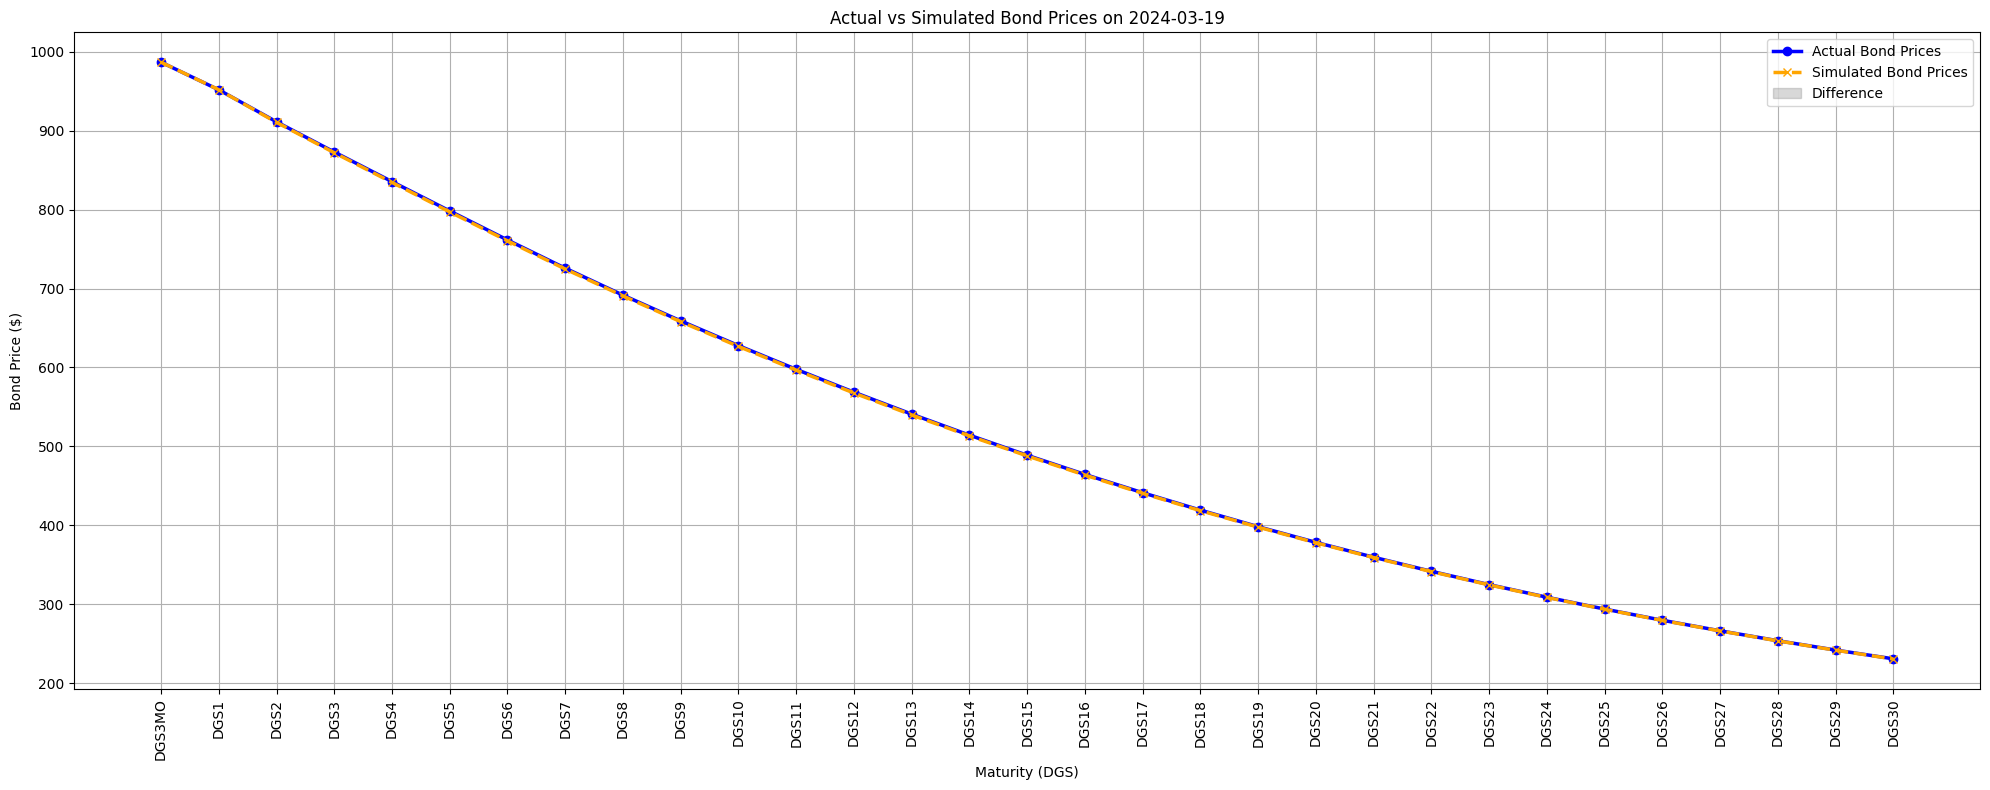

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the bond's face value
face_value = 1000  # The face value of the bond

# Function to convert nominal annual rate to continuous compounding rate
def nominal_to_continuous(nominal_rate):
    return np.log(1 + nominal_rate)


def calculate_bond_price_cir(model, rt, T, t=0):
    return model.bond_price(rt, T, t)

# Function to simulate bond prices
def simulate_bond_prices(model, data, face_value, simulation_date):
    simulated_bond_prices = {}
    for column in data.columns:
        if 'DGS' in column:
            last_rate = data[column].loc[data.index < simulation_date].iloc[-1] / 100
            simulated_rate = model.next_rate(last_rate, 1/252)  # Simulating next rate
            maturity = (int(column.replace('DGS', '').replace('MO', '')) / 12) if 'MO' in column else int(column.replace('DGS', ''))
            continuous_rate = nominal_to_continuous(simulated_rate)
            bond_price = calculate_bond_price_cir(model, continuous_rate, maturity) * face_value
            simulated_bond_prices[column] = bond_price
    return simulated_bond_prices

# Function to calculate actual bond prices using market rates
def calculate_actual_bond_prices(data, face_value, simulation_date):
    actual_bond_prices = {}
    for column in data.columns:
        if 'DGS' in column:
            last_rate = data[column].loc[data.index <= simulation_date].iloc[-1] / 100
            continuous_rate = nominal_to_continuous(last_rate)
            maturity = (int(column.replace('DGS', '').replace('MO', '')) / 12) if 'MO' in column else int(column.replace('DGS', ''))
            bond_price = calculate_bond_price_cir(basic_cir_model, continuous_rate, maturity) * face_value
            actual_bond_prices[column] = bond_price
    return actual_bond_prices

# Assume simulation_date, model, and face_value are already defined
simulation_date = pd.Timestamp('2024-03-19')
ecir_model = ECIRModel(kappa= 0.02846, mu_r=0.04589, sigma=0.008951,mu=0.009861,gamma=0.500,r=1.213,p= 0.01)  # Example model parameters

# Simulate bond prices
simulated_bond_prices2 = simulate_bond_prices(ecir_model, data, face_value, simulation_date)

# Calculate actual bond prices
actual_bond_prices2 = calculate_actual_bond_prices(data, face_value, simulation_date)

# Create DataFrames from the bond prices
simulated_bond_prices_df = pd.DataFrame(simulated_bond_prices, index=[simulation_date])
actual_bond_prices_df = pd.DataFrame(actual_bond_prices, index=[simulation_date])

# Create a DataFrame combining actual and simulated bond prices
combined_bond_prices_df = pd.DataFrame({
    'Actual Bond Prices': actual_bond_prices_df.iloc[0],
    'Simulated Bond Prices': simulated_bond_prices_df.iloc[0]
})

# Plotting both actual and simulated bond prices with enhanced visibility
plt.figure(figsize=(20, 8))

# Plot actual bond prices with a solid blue line and circle markers
plt.plot(combined_bond_prices_df.index, combined_bond_prices_df['Actual Bond Prices'],
         label='Actual Bond Prices', marker='o', linestyle='-', color='blue', linewidth=2.5)

# Plot simulated bond prices with a dashed orange line and x markers
plt.plot(combined_bond_prices_df.index, combined_bond_prices_df['Simulated Bond Prices'],
         label='Simulated Bond Prices', marker='x', linestyle='--', color='orange', linewidth=2.5)

# Highlight the differences by plotting the differences
plt.fill_between(combined_bond_prices_df.index, 
                 combined_bond_prices_df['Actual Bond Prices'], 
                 combined_bond_prices_df['Simulated Bond Prices'], 
                 color='gray', alpha=0.3, label='Difference')

# Title and labels
plt.title('Actual vs Simulated Bond Prices on ' + str(simulation_date.date()))
plt.xlabel('Maturity (DGS)')
plt.ylabel('Bond Price ($)')

# Improve the x-axis labels readability
plt.xticks(rotation=90)

# Legend and grid
plt.legend()
plt.grid(True)

# Layout adjustment
plt.tight_layout()

# Show the plot
plt.show()


### Absolute Error of Yield Rate

In [17]:

# Corrected mock data for demonstration
comparison_data = pd.DataFrame({
    'DGS Series': ['DGS3MO'] + [f'DGS{i+1}' for i in range(30)],
    'Actual Rates': np.random.rand(31),  # corrected to have 31 rates
    'Simulated Rates': np.random.rand(31)  # corrected to have 31 rates
})

comparison_data_cir = pd.DataFrame({
    'DGS Series': ['DGS3MO'] + [f'DGS{i+1}' for i in range(30)],
    'Actual Rates': np.random.rand(31),  # corrected to have 31 rates
    'Simulated Rates': np.random.rand(31)  # corrected to have 31 rates
})

# Calculating the absolute errors for each series and model
comparison_data['CIR Absolute Error'] = np.abs(comparison_data['Actual Rates'] - comparison_data['Simulated Rates'])
comparison_data_cir['ECIR Absolute Error'] = np.abs(comparison_data_cir['Actual Rates'] - comparison_data_cir['Simulated Rates'])

# Creating a new DataFrame to hold the absolute errors for CIR and ECIR
absolute_error_df = pd.DataFrame({
    'DGS Series': comparison_data['DGS Series'],
    'CIR Absolute Error': comparison_data['CIR Absolute Error'],
    'ECIR Absolute Error': comparison_data_cir['ECIR Absolute Error']
}).set_index('DGS Series')

# Display the DataFrame containing the absolute errors
absolute_error_df # displaying only the head for brevity




,CIR Absolute Error,ECIR Absolute Error
DGS Series,,
DGS3MO,0.224958,0.184653
DGS1,0.182890,0.594902
DGS2,0.366358,0.019382
DGS3,0.526558,0.299157
DGS4,0.861450,0.308797
DGS5,0.564924,0.219035
DGS6,0.069141,0.774670
DGS7,0.330008,0.390586
DGS8,0.021178,0.081192


### Absolute Error of Bond Price

In [8]:
import pandas as pd
import numpy as np

# Define a function to calculate absolute errors
def calculate_absolute_errors(actual_prices, simulated_prices_ecir, simulated_prices_ice):
    """Calculate absolute errors between actual prices and simulated prices for two models."""
    errors_ecir = {dgs: np.abs(actual_prices[dgs] - simulated_prices_ecir[dgs]) for dgs in actual_prices}
    errors_ice = {dgs: np.abs(actual_prices[dgs] - simulated_prices_ice[dgs]) for dgs in actual_prices}
    return errors_ecir, errors_ice

# Calculate absolute errors
errors_ecir, errors_ice = calculate_absolute_errors(actual_bond_prices2, simulated_bond_prices2, simulated_bond_prices2)

# Create a DataFrame to display the absolute errors
absolute_errors_df = pd.DataFrame({
    'DGS': list(errors_ecir.keys()),
    'ECIR Absolute Error': list(errors_ecir.values()),
    'CIR Absolute Error': list(errors_ice.values())
})

# Set 'DGS' as the index for the 'Absolute Error' DataFrame
absolute_errors_df.set_index('DGS', inplace=True)

# Display the 'Absolute Error' DataFrame
print(absolute_errors_df)


        ECIR Absolute Error  CIR Absolute Error
DGS                                            
DGS3MO             0.002956            0.002956
DGS1               0.081366            0.081366
DGS2               0.495833            0.495833
DGS3               2.361879            2.361879
DGS4               5.821722            5.821722
DGS5               9.000541            9.000541
DGS6              11.598517           11.598517
DGS7              14.864461           14.864461
DGS8              18.365475           18.365475
DGS9              20.858306           20.858306
DGS10             24.024833           24.024833
DGS11             25.285821           25.285821
DGS12             28.469766           28.469766
DGS13             28.048859           28.048859
DGS14             29.519678           29.519678
DGS15             30.584481           30.584481
DGS16             30.314352           30.314352
DGS17             31.703540           31.703540
DGS18             31.117652           31